In [87]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

In [88]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []

for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000143CA8E3390>>
Traceback (most recent call last):
  File "c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
data.columns = ["recording"]

In [ ]:
christophs_fussy_mess = []
for sample in data["recording"]:
    christophs_fussy_mess.extend([[sample.labels["path_idx"],sample.labels["activities"],
                                   sample.data["longitude"],sample.data["latitude"],
                                   sample.data["speed"],sample.data["altitude"]]])

In [ ]:
christophs_fussy_mess = pd.DataFrame(christophs_fussy_mess)

In [ ]:
christophs_fussy_mess.columns = ["path_idx","activities","longitude","latitude","speed","altitude"]

In [ ]:
christophs_fussy_mess

,path_idx,activities,longitude,latitude,speed,altitude
0,2,[1],"Trace(title='longitude', total_time=584.87, sa...","Trace(title='latitude', total_time=584.87, sam...","Trace(title='speed', total_time=584.87, sample...","Trace(title='altitude', total_time=584.87, sam..."
1,0,"[1, 2]","Trace(title='longitude', total_time=519.01, sa...","Trace(title='latitude', total_time=519.01, sam...","Trace(title='speed', total_time=519.01, sample...","Trace(title='altitude', total_time=519.01, sam..."
2,0,"[0, 1, 2]","Trace(title='longitude', total_time=594.12, sa...","Trace(title='latitude', total_time=594.12, sam...","Trace(title='speed', total_time=594.12, sample...","Trace(title='altitude', total_time=594.12, sam..."
3,2,[1],"Trace(title='longitude', total_time=519.63, sa...","Trace(title='latitude', total_time=519.63, sam...","Trace(title='speed', total_time=519.63, sample...","Trace(title='altitude', total_time=519.63, sam..."
4,1,[1],"Trace(title='longitude', total_time=625.44, sa...","Trace(title='latitude', total_time=625.44, sam...","Trace(title='speed', total_time=625.44, sample...","Trace(title='altitude', total_time=625.44, sam..."
...,...,...,...,...,...,...
391,3,"[0, 1, 2]","Trace(title='longitude', total_time=325.70, sa...","Trace(title='latitude', total_time=325.70, sam...","Trace(title='speed', total_time=325.70, sample...","Trace(title='altitude', total_time=325.70, sam..."
392,4,[1],"Trace(title='longitude', total_time=619.13, sa...","Trace(title='latitude', total_time=619.13, sam...","Trace(title='speed', total_time=619.13, sample...","Trace(title='altitude', total_time=619.13, sam..."
393,2,[1],"Trace(title='longitude', total_time=747.65, sa...","Trace(title='latitude', total_time=747.65, sam...","Trace(title='speed', total_time=747.65, sample...","Trace(title='altitude', total_time=747.65, sam..."
394,3,[1],"Trace(title='longitude', total_time=456.01, sa...","Trace(title='latitude', total_time=456.01, sam...","Trace(title='speed', total_time=456.01, sample...","Trace(title='altitude', total_time=456.01, sam..."


In [ ]:
#data["recording"].data["phone_steps"]

AttributeError: 'Series' object has no attribute 'data'

In [89]:
def check_only_number(lst, num):
    return all(x == num for x in lst)

In [90]:
christophs_fussy_mess["activities"]

0            [1]
1         [1, 2]
2      [0, 1, 2]
3            [1]
4            [1]
         ...    
391    [0, 1, 2]
392          [1]
393          [1]
394          [1]
395    [1, 0, 1]
Name: activities, Length: 396, dtype: object

In [91]:
i = 0
list_singles = []
for sample in christophs_fussy_mess["activities"]:
    if(check_only_number(sample,1)):
        list_singles.append(i)
    i = i + 1

In [92]:
list_singles

[0,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 16,
 20,
 22,
 23,
 24,
 29,
 31,
 33,
 37,
 38,
 39,
 43,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 57,
 60,
 61,
 63,
 65,
 68,
 70,
 71,
 72,
 77,
 78,
 79,
 83,
 84,
 85,
 86,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 103,
 106,
 107,
 109,
 112,
 115,
 116,
 117,
 120,
 121,
 122,
 123,
 125,
 126,
 128,
 129,
 131,
 134,
 135,
 137,
 138,
 141,
 142,
 143,
 145,
 146,
 151,
 152,
 153,
 156,
 160,
 163,
 165,
 168,
 169,
 170,
 172,
 173,
 175,
 176,
 177,
 180,
 181,
 185,
 186,
 193,
 194,
 197,
 199,
 200,
 202,
 205,
 206,
 208,
 209,
 210,
 215,
 217,
 220,
 222,
 225,
 226,
 227,
 230,
 231,
 233,
 234,
 235,
 237,
 241,
 244,
 247,
 248,
 249,
 251,
 252,
 253,
 254,
 255,
 256,
 258,
 260,
 261,
 263,
 264,
 266,
 269,
 270,
 271,
 273,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 289,
 290,
 291,
 292,
 294,
 299,
 301,
 302,
 303,
 307,
 309,
 310,
 311,
 314,
 316,
 318,
 319,
 322,
 324,
 325,
 326,
 327,
 32

In [93]:
i = 0
list_singles = []
for sample in christophs_fussy_mess["activities"]:
    if(check_only_number(sample,3)):
        list_singles.append(i)
    i = i + 1

In [94]:
list_singles

[27, 46, 82, 114, 154, 155, 179, 184, 238, 287, 288, 298, 315, 329, 361]

In [95]:
data

c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


,0
0,"Recording(filename='train_trace_000.pkl', labe..."
1,"Recording(filename='train_trace_001.pkl', labe..."
2,"Recording(filename='train_trace_002.pkl', labe..."
3,"Recording(filename='train_trace_003.pkl', labe..."
4,"Recording(filename='train_trace_004.pkl', labe..."
...,...
391,"Recording(filename='train_trace_391.pkl', labe..."
392,"Recording(filename='train_trace_392.pkl', labe..."
393,"Recording(filename='train_trace_393.pkl', labe..."
394,"Recording(filename='train_trace_394.pkl', labe..."


In [96]:
data["recording"][2]

KeyError: 'recording'

In [ ]:
for sample in data["recording"]:

    if sample.data["phone_steps"] == None:
        print("shiet")

    else:
        print(sample.data["phone_steps"])

Trace(title='phone_steps', total_time=584.87, samplerate=12.52, max_update_gap=18.00)
Trace(title='phone_steps', total_time=519.01, samplerate=12.52, max_update_gap=15.42)


KeyError: 'phone_steps'

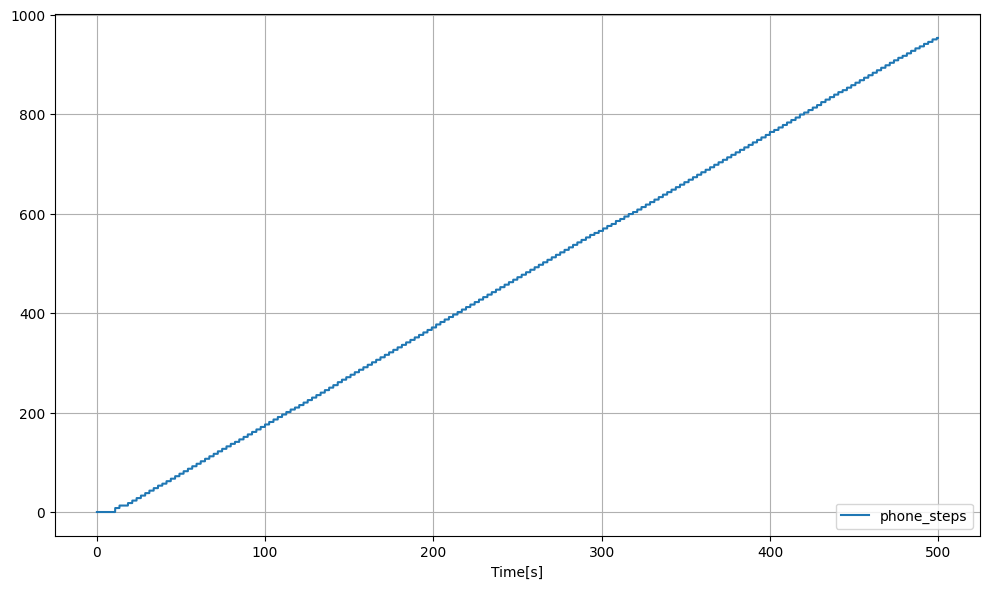

In [ ]:
data["recording"][5].plot(["phone_steps"])

In [ ]:
# Define the keys you want to fill with None if they are missing
keys_to_fill = ["phone_steps"]

# Use a dictionary comprehension to fill missing keys with None
#data["recording"] = {key: data["recording"].get(key, None) for key in keys_to_fill}

print(data["recording"])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
391    NaN
392    NaN
393    NaN
394    NaN
395    NaN
Name: recording, Length: 396, dtype: object
